## Laboratorio 3

Ignacio Méndez Alvarez (22613) y Diego Soto Flores (22737)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from generators.polymnist_generator import PolyMNISTGenerator

In [2]:
train_dir = "PolyMNIST/MMNIST/train"
test_dir = "PolyMNIST/MMNIST/test"
train_gen = PolyMNISTGenerator(train_dir, batch_size=128)
test_gen = PolyMNISTGenerator(test_dir, batch_size=128, shuffle=False)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10
)

Epoch 1/10
2344/2344 [==============================] - 420s 179ms/step - loss: 0.1424 - accuracy: 0.9544 - val_loss: 0.0705 - val_accuracy: 0.9778
Epoch 2/10
2344/2344 [==============================] - 454s 194ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 3/10
2344/2344 [==============================] - 496s 212ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0664 - val_accuracy: 0.9816
Epoch 4/10
2344/2344 [==============================] - 533s 228ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0604 - val_accuracy: 0.9850
Epoch 5/10
2344/2344 [==============================] - 439s 187ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0465 - val_accuracy: 0.9857
Epoch 6/10
2344/2344 [==============================] - 378s 160ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0695 - val_accuracy: 0.9840
Epoch 7/10
2344/2344 [==============================] - 324s 138ms/step - loss: 0.0086 - accuracy: 0.9972 - val_

In [6]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Precisión en test: {test_acc:.4f}")

391/391 [==============================] - 30s 76ms/step - loss: 0.0670 - accuracy: 0.9877
Precisión en test: 0.9877


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

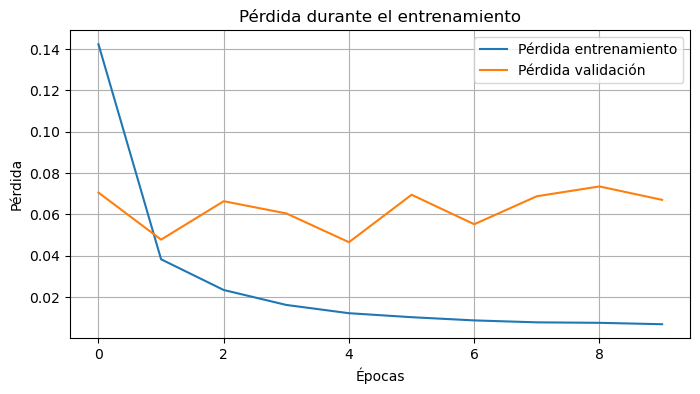

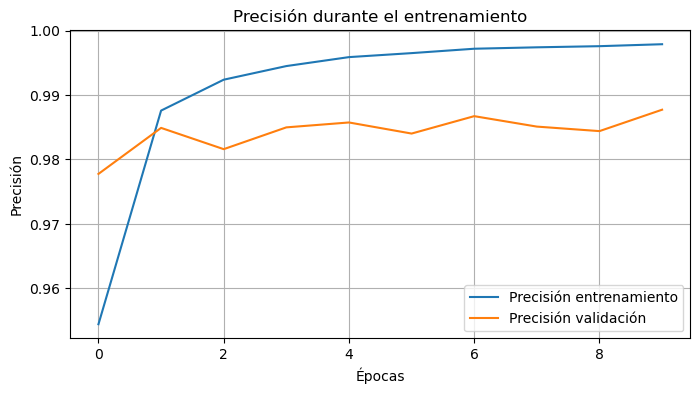

In [8]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Graficar precisión
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
model.save("modelo_cnn_polymnist.h5")
print("Modelo guardado como modelo_cnn_polymnist.h5")

Modelo guardado como modelo_cnn_polymnist.h5


c:\Users\dfsf2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 10ms/step


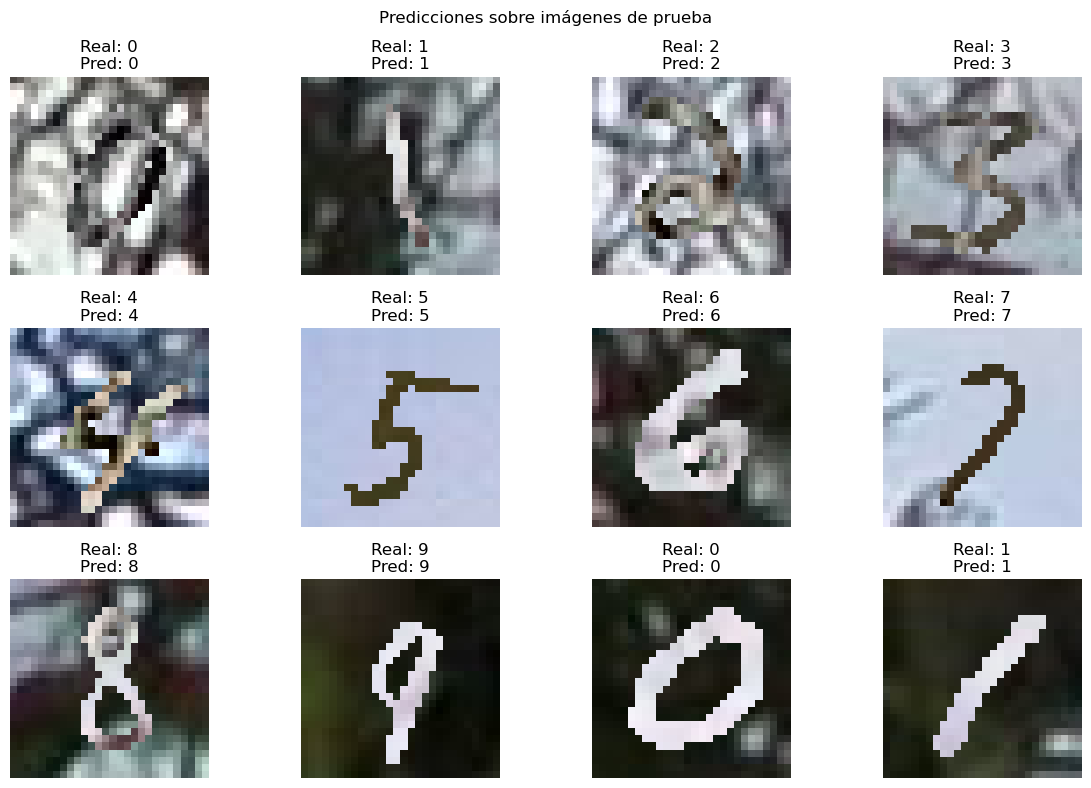

In [11]:
class_names = [str(i) for i in range(10)]
X_test, y_test = test_gen[0]  # tomar el primer batch
preds = model.predict(X_test)
preds_labels = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_true[i]]}\nPred: {class_names[preds_labels[i]]}")

plt.suptitle("Predicciones sobre imágenes de prueba")
plt.tight_layout()
plt.show()

In [15]:
y_true_all = []
y_pred_all = []
for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    pred_batch = model.predict(X_batch)
    y_true_all.extend(np.argmax(y_batch, axis=1))
    y_pred_all.extend(np.argmax(pred_batch, axis=1))

3/3 [==============================] - 0s 9ms/step



Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4900
           1       0.99      0.99      0.99      5675
           2       0.99      0.99      0.99      5160
           3       0.99      0.99      0.99      5050
           4       0.98      0.99      0.99      4910
           5       0.98      0.99      0.98      4460
           6       0.99      0.99      0.99      4790
           7       0.99      0.99      0.99      5140
           8       0.99      0.98      0.99      4870
           9       0.99      0.96      0.98      5045

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



<Figure size 800x600 with 0 Axes>

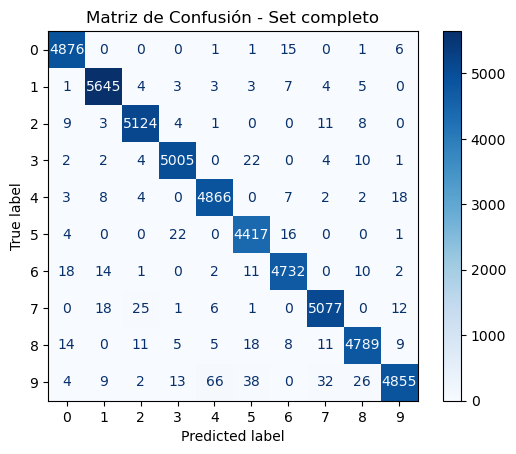

In [16]:
# Reporte de clasificación completo
print("\nReporte de clasificación completo:")
print(classification_report(y_true_all, y_pred_all, target_names=class_names))

# Matriz de confusión global
cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title("Matriz de Confusión - Set completo")
plt.grid(False)
plt.show()


# **Modelo 2**

In [19]:
train_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/train", batch_size=128)
test_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/test", batch_size=128, shuffle=False)


In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

In [21]:
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
history2 = model2.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10
)

Epoch 1/10
2344/2344 [==============================] - 507s 216ms/step - loss: 0.1865 - accuracy: 0.9408 - val_loss: 0.0976 - val_accuracy: 0.9679
Epoch 2/10
2344/2344 [==============================] - 519s 221ms/step - loss: 0.0674 - accuracy: 0.9783 - val_loss: 0.0485 - val_accuracy: 0.9844
Epoch 3/10
2344/2344 [==============================] - 506s 216ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0326 - val_accuracy: 0.9896
Epoch 4/10
2344/2344 [==============================] - 508s 217ms/step - loss: 0.0385 - accuracy: 0.9871 - val_loss: 0.0519 - val_accuracy: 0.9862
Epoch 5/10
2344/2344 [==============================] - 479s 204ms/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 6/10
2344/2344 [==============================] - 445s 190ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 7/10
2344/2344 [==============================] - 432s 184ms/step - loss: 0.0239 - accuracy: 0.9920 - val_

In [23]:
test_loss2, test_acc2 = model2.evaluate(test_gen)
print(f"Precisión en test (modelo mejorado): {test_acc2:.4f}")

391/391 [==============================] - 28s 72ms/step - loss: 0.0331 - accuracy: 0.9902
Precisión en test (modelo mejorado): 0.9902


In [24]:
model2.save("modelo_cnn_mejorado.h5")
print("Modelo guardado como modelo_cnn_mejorado.h5")

Modelo guardado como modelo_cnn_mejorado.h5


c:\Users\dfsf2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


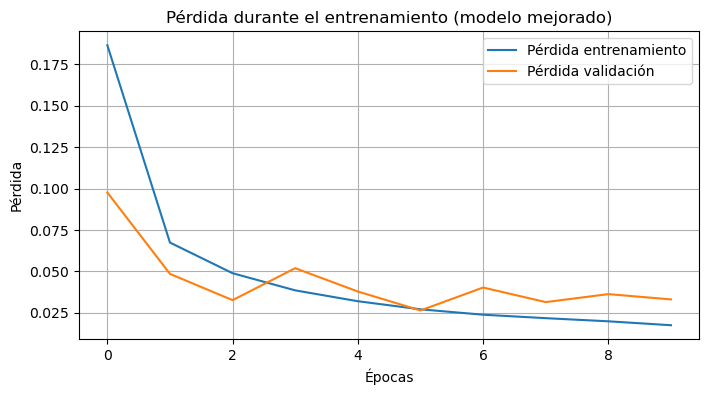

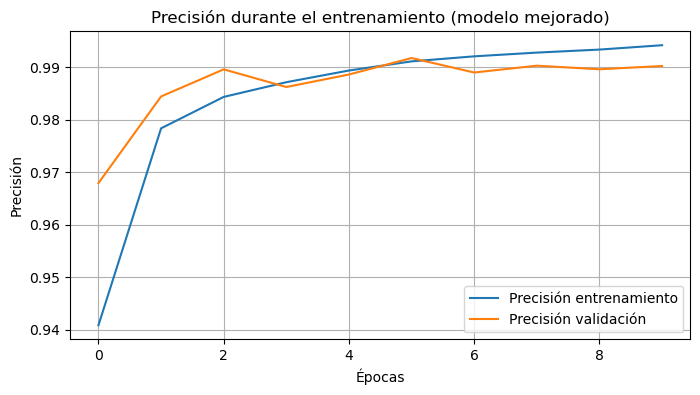

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(history2.history['loss'], label='Pérdida entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento (modelo mejorado)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history2.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento (modelo mejorado)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 13ms/step


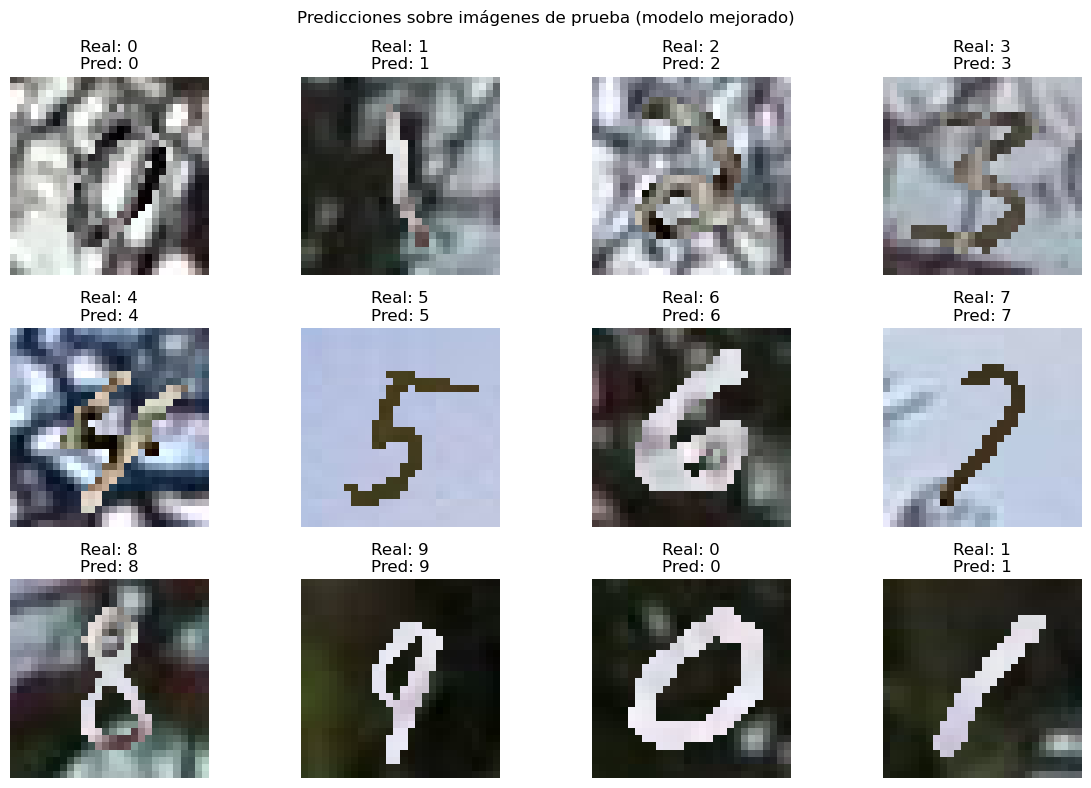

In [28]:
class_names = [str(i) for i in range(10)]
X_test, y_test = test_gen[0]
preds = model2.predict(X_test)
preds_labels = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_true[i]]}\nPred: {class_names[preds_labels[i]]}")

plt.suptitle("Predicciones sobre imágenes de prueba (modelo mejorado)")
plt.tight_layout()
plt.show()

In [26]:
class_names = [str(i) for i in range(10)]
y_true_all = []
y_pred_all = []
for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    pred_batch = model2.predict(X_batch)
    y_true_all.extend(np.argmax(y_batch, axis=1))
    y_pred_all.extend(np.argmax(pred_batch, axis=1))

3/3 [==============================] - 0s 12ms/step



Reporte de clasificación - Modelo Mejorado
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4900
           1       1.00      1.00      1.00      5675
           2       0.99      0.99      0.99      5160
           3       0.99      0.99      0.99      5050
           4       0.99      0.98      0.99      4910
           5       0.99      0.99      0.99      4460
           6       0.99      0.99      0.99      4790
           7       0.99      0.98      0.99      5140
           8       0.98      0.99      0.99      4870
           9       0.98      0.99      0.98      5045

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



<Figure size 800x600 with 0 Axes>

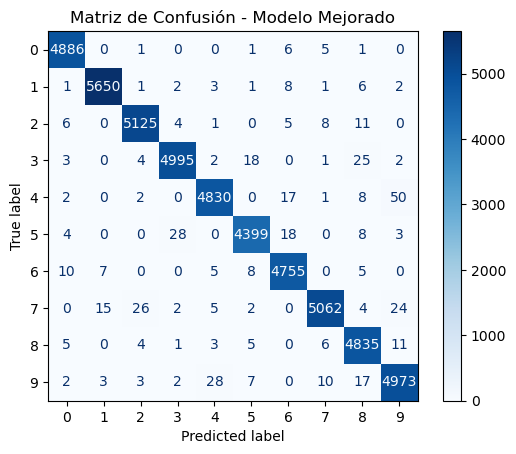

In [27]:
print("\nReporte de clasificación - Modelo Mejorado")
print(classification_report(y_true_all, y_pred_all, target_names=class_names))

cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title("Matriz de Confusión - Modelo Mejorado")
plt.grid(False)
plt.show()